# Multibody dynamics of simple biomechanical models

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

The human body is composed of multiple interconnected segments (which can be modeled as rigid or flexible) and each segment may have translational and rotational movement. The part of mechanics for the study of movement and forces of interconnected bodies is called [multibody system](http://en.wikipedia.org/wiki/Multibody_system) or multibody dynamics. 

There are different approaches to deduce the kinematics and dynamics of such bodies, the most common are the [Newton-Euler](http://en.wikipedia.org/wiki/Newton%E2%80%93Euler_equations) and the [Langrangian](http://en.wikipedia.org/wiki/Lagrangian_mechanics) formalisms. The Newton-Euler formalism is based on the well known Newton-Euler equations. The Langrangian formalism uses the [principle of least action](http://en.wikipedia.org/wiki/Principle_of_least_action) and describes the movement based on [generalized coordinates](http://en.wikipedia.org/wiki/Generalized_coordinates), a set of parameters (typically, a convenient minimal set) to describe the configuration of the system taking into account its constraints. For a system with multiple bodies and several constraints, e.g., the human body, it is easier to describe the dynamics of such system using the Langrangian formalism. 

Next, we will study two simple problems of multibody systems in the context of biomechanics which we can handle well using the Newton-Euler approach. First a planar one-link system (which is not a multibody!), which can represent the movement of one limb of the body or the entire body as a single inverted pendulum. Second, a planar two-link system, which can represent the movement of two segments of the body, e.g., upper arm and forearm. Zajac and Gordon (1989) and Zajac (1993) offer excellent discussions about applying multibody system concepts to understanding human body movement.

## Newton-Euler equations

For a two-dimensional movement in the $XY$ plane, the Newton-Euler equations are:  

\begin{equation}
\left\{ \begin{array}{l l}
\sum F_X = m \ddot{x}_{cm} \\
\\
\sum F_Y = m \ddot{y}_{cm} \\
\\
\sum M_Z = I_{cm} \ddot{\alpha}_Z
\end{array} \right.
\label{}
\end{equation}

Where the movement is described around the body center of mass ($cm$). $(F_X,\,F_Y)$ and $M_Z$ are, respectively, the forces and moment of forces (torques) acting on the body, $(\ddot{x}_{cm},\,\ddot{y}_{cm})$ and $\ddot{\alpha}_Z$ are, respectively, the linear and angular accelerations, and $I_{cm}$ is the body moment of inertia around the $Z$ axis passing through the body center of mass.  

Let's use Sympy to derive some of the characteristics of the systems.

In [1]:
from sympy import Symbol, symbols, cos, sin, Matrix, simplify
from sympy.physics.mechanics import dynamicsymbols, mlatex, init_vprinting
init_vprinting()
from IPython.display import display, Math

## One-link system

Let's study the dynamics of a planar inverted pendulum as a model for the movement of a human body segment with an external force acting on the segment (see Figure 1). 

<figure><img src="./../images/invpend1.png" alt="Inverted pendulum"/><figcaption><i><center>Figure. Planar inverted pendulum with joint actuators (muscles) and corresponding free body diagram. See text for notation convention.</center></i></figcaption> 

The following notation convention will be used for this problem:  

 - $L$ is the length of the segment.  
 - $d$ is the distance from the joint of the segment to its center of mass position.  
 - $m$ is the mass of the segment. 
 - $g$ is the gravitational acceleration (+).   
 - $\alpha$ is the angular position of the joint w.r.t. horizontal, $\ddot{\alpha_i}$ is the corresponding angular acceleration.  
 - $I$ is the moment of inertia of the segment around its center of mass position.  
 - $F_{r}$ is the joint reaction force.  
 - $F_{e}$ is the external force acting on the segment.
 - $T$ is the joint moment of force (torque). 
 
Muscles responsible for the movement of the segment are represented as a single pair of antagonistic joint actuators (e.g., flexors and extensors). We will consider that all joint torques are generated only by these muscles (we will disregard the torques generated by ligaments and other tissues) and the total or net joint torque will be the sum of the torques generated by the two muscles:

\begin{equation}
T = T_{net} = T_{extension} - T_{flexion} $$

Where we considered the extensor torque as positive. In what follows, we will determine only the net torque, we will be unable to decompose the net torque in its components.

### Kinetics
 
From the free body diagram, the Newton-Euler equations for the planar inverted pendulum are:

\begin{equation}
\begin{array}{l l}
F_{r,x} + F_{e,x} = m\ddot{x} \\
\\
F_{r,y} - mg + F_{e,y} = m\ddot{y} \\
\\
T + dF_{r,x}\sin\alpha - dF_{r,y}\cos\alpha - (L-d)F_{e,x}\sin\alpha + (L-d)F_{e,y}\cos\alpha = I\ddot{\alpha}
\end{array}
\label{}
\end{equation}

However, manually placing the terms in the Newton-Euler equations as we did above where we calculated the signs of the cross products is error prone. We can avoid this manual placing by treating the quantities as vectors and express them in matricial form:

\begin{equation}
\begin{array}{l l}
\mathbf{F}_r + \mathbf{F}_g + \mathbf{F}_e = m\ddot{\mathbf{r}} \\
\\
\mathbf{T} + \mathbf{r}_{cm,j} \times \mathbf{F}_r + \mathbf{r}_{cm,e} \times \mathbf{F}_e = I\ddot{\mathbf{\alpha}}
\end{array}
\label{}
\end{equation}

Where:

\begin{equation}
\begin{bmatrix} F_{rx} \\ F_{ry} \\ 0 \end{bmatrix}  + \begin{bmatrix} 0 \\ -g \\ 0 \end{bmatrix}  + \begin{bmatrix} F_{ex} \\ F_{ey} \\ 0 \end{bmatrix} = m\begin{bmatrix} \ddot{x} \\ \ddot{y} \\ 0 \end{bmatrix} , \quad \begin{bmatrix} \hat{i} \\ \hat{j} \\ \hat{k} \end{bmatrix}
\label{}
\end{equation}

\begin{equation}
\begin{bmatrix} 0 \\ 0 \\ T_z \end{bmatrix}  + \begin{bmatrix} -d\cos\alpha \\ -d\sin\alpha \\ 0 \end{bmatrix}  \times \begin{bmatrix} F_{rx} \\ F_{ry} \\ 0 \end{bmatrix} + \begin{bmatrix} (L-d)\cos\alpha \\ (L-d)\sin\alpha \\ 0 \end{bmatrix}  \times \begin{bmatrix} F_{ex} \\ F_{ey} \\ 0 \end{bmatrix} = I_z\begin{bmatrix} 0 \\ 0 \\ \ddot{\alpha} \end{bmatrix} , \quad \begin{bmatrix} \hat{i} \\ \hat{j} \\ \hat{k} \end{bmatrix} $$

Note that $\times$ represents the cross product, not matrix multiplication. Then, both in symbolic or numeric manipulation we would use the cross product function to perform part of the calculations. There are different computational tools that can be used for the formulation of the equations of motion. For instance, Sympy has a module, [Classical Mechanics](http://docs.sympy.org/dev/modules/physics/mechanics/), and see [this list](http://real.uwaterloo.ca/~mbody/#Software) for other software. Let's continue with the manual formulation of the equations hence they are not complex.  

We can rewrite the equation for the moments of force in a form that doesn't explicitly involve the joint reaction force expressing the moments of force around the joint center:

\begin{equation}
T - mgd\cos\alpha - LF_{e,x}\sin\alpha + LF_{e,y}\cos\alpha = I_o\ddot{\alpha}
\label{}
\end{equation}

Where $I_o$ is the moment of inertia around the joint, $I_o=I_{cm}+md^2$, using the parallel axis theorem.  

The torque due to the joint reaction force does not appear on this equation; this torque is null because by the definition the reaction force acts on the joint. If we want to determine the joint torque and we know the kinematics, we perform inverse dynamics:

\begin{equation}
T = I_o\ddot{\alpha} + mgd \cos \alpha + LF_{e,x}\sin\alpha - LF_{e,y}\cos\alpha
\label{}
\end{equation}

If we want to determine the kinematics and we know the joint torque, we perform direct dynamics:

\begin{equation}
\ddot{\alpha} = I_o^{-1}[T - mgd \cos \alpha - LF_{e,x}\sin\alpha + LF_{e,y}\cos\alpha ]
\label{}
\end{equation}

The expression above is a second-order differential equation which typically is solved numerically. So, unless we are explicitly interested in estimating the joint reaction forces, we don't need to use them for calculating the joint torque or simulate movement. Anyway, let's look at the kinematics of this problem to introduce some important concepts which will be needed later.

### Kinematics

A single planar inverted pendulum has one degree of freedom, the rotation movement of the segment around the pin joint. In this case, if the angular position $\alpha(t)$ is known, the coordinates $x(t)$ and $y(t)$ of the center of mass and their derivatives can be readily determined (a process referred as forward kinematics):

In [2]:
t = Symbol('t')
d, L = symbols('d L', positive=True)
a = dynamicsymbols('alpha')

In [3]:
x, y = d*cos(a), d*sin(a)
xd, yd = x.diff(t), y.diff(t)
xdd, ydd = xd.diff(t), yd.diff(t)

display(Math(r'x=' + mlatex(x)))
display(Math(r'\dot{x}=' + mlatex(xd)))
display(Math(r'\ddot{x}=' + mlatex(xdd)))
display(Math(r'y=' + mlatex(y)))
display(Math(r'\dot{y}=' + mlatex(yd)))
display(Math(r'\ddot{y}=' + mlatex(ydd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The terms in $\ddot{x}$ and $\ddot{y}$ proportional to $\dot{\alpha}^2$ are components of the centripetal acceleration on the body. As the name suggests, the [centripetal](http://en.wikipedia.org/wiki/Centripetal_force) acceleration is always directed to the center (towards the joint) when the segment is rotating. See the notebook [Kinematic chain](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/KinematicChain.ipynb) for more on that.

As an exercise, let's go back to the Newton-Euler equation for the sum of torques around the center of mass where the torques due to the joint reaction forces are explicit. From the equation for the the sum of forces, hence we have expressions for the linear accelerations, we can isolate the reaction forces and substitute them on the equation for the torques. With a little help from Sympy:

In [4]:
m, I, g = symbols('m I g', positive=True)
Fex, Fey = symbols('F_ex F_ey')
add = a.diff(t, 2)

In [5]:
Frx = m*xdd - Fex
Fry = m*ydd + m*g - Fey
display(Math(r'F_{rx}=' + mlatex(Frx)))
display(Math(r'F_{ry}=' + mlatex(Fry)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
T = I*add - d*sin(a)*Frx + d*cos(a)*Fry + (L-d)*sin(a)*Fex - (L-d)*cos(a)*Fey
display(Math(r'T\quad=\quad ' + mlatex(T)))

<IPython.core.display.Math object>

This equation for the torques around the center of mass of only one rotating segment seems too complicated. The equation we derived before for the torques around the joint was much simpler. However, if we look at the terms on this last equation, we can simplify most of them. Let's use Sympy to simplify this equation:

In [7]:
T = simplify(T)
display(Math(r'T=' + mlatex(T)))

<IPython.core.display.Math object>

And we are back to the more simple equation we've seen before. The first two terms on the right side are the torque due to the external force, the third and fourth are the moment of inertia around the joint (use the theorem of parallel axis) times the acceleration, and the last term is the gravitational torque.  

But what happened with all the other terms in the equation?  

First, the terms proportional to the angular acceleration were just components from each direction of the 'inertial' torque that when summed resulted in $md^2\ddot{\alpha}$. 
Second, the terms proportional to $\dot{\alpha}^2$ are components of the torque due to the centripetal force (acceleration). But the centripetal force passes through the joint as well as through the center of mass, i.e., it has zero lever arm and this torque should be zero. Indeed, when summed these terms are canceled out.  

Now let's study a two-link system which can rotate independently around each joint. We will see that now the torque due to the centripetal force most of the times will not cancel out and a new torque component will appear.

### The Jacobian matrix

Another way to deduce the velocity and acceleration of a point at the rotating link is to use the [Jacobian matrix](http://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) (see [Kinematic chain](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/KinematicChain.ipynb)). Remember that in the context of kinematic chains, the Jacobian is a matrix of all first-order partial derivatives of the linear position vector of the endpoint with respect to the angular position vector. For the planar one-link case, this means that the Jacobian matrix is:

\begin{equation}
\mathbf{J}= 
\begin{bmatrix}
\dfrac{\partial x}{\partial \alpha} \\
\dfrac{\partial y}{\partial \alpha} \\
\end{bmatrix}
\label{}
\end{equation}

In [8]:
r = Matrix((x, y))
J = r.diff(a)
display(Math(r'\mathbf{J}=' + mlatex(J)))

<IPython.core.display.Math object>

And Sympy has a function to calculate the Jacobian:

In [9]:
J = r.jacobian([a])
display(Math(r'\mathbf{J}=' + mlatex(J)))

<IPython.core.display.Math object>

The linear velocity of a point in the link will be given by the product between the Jacobian of the kinematic link and its angular velocity:

\begin{equation}
\mathbf{v} = \mathbf{J} \dot{\alpha}
\label{}
\end{equation}

Using Sympy:

In [10]:
vel = J*a.diff(t)
display(Math(r'\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix}=' + mlatex(vel)))

<IPython.core.display.Math object>

And the linear acceleration will be given by the derivative of this last expression:
 
\begin{equation}
\mathbf{a} = \dot{\mathbf{J}} \dot{\alpha} + \mathbf{J} \ddot{\alpha}
\label{}
\end{equation}

And using Sympy again:

In [11]:
acc = (J*a.diff(t)).diff(t)
display(Math(r'\begin{bmatrix} \ddot{x} \\ \ddot{y} \end{bmatrix}=' + mlatex(acc)))

<IPython.core.display.Math object>

Same expressions as before.

We can also use the Jacobian matrix to calculate the torque due to a force on the link:

\begin{equation}
T = \mathbf{J}^T \begin{bmatrix} F_{ex} \\ F_{ey} \end{bmatrix}
\label{}
\end{equation}

In [12]:
Te = J.T*Matrix((Fex, Fey))
display(Math(r'T_e=' + mlatex(Te[0])))

<IPython.core.display.Math object>

## Two-link system

Let's study the dynamics of a planar double inverted pendulum (see Figure 2) as a model of two interconnected segments in the human body with an external force acting on the distal segment. Once again, we will consider that there are muscles around each joint and they generate torques.

<figure><img src="./../images/invpend2.png" alt="Double inverted pendulum"/><figcaption><i><center>Figure. Planar double inverted pendulum  with joint actuators (muscles) and corresponding free body diagrams. See text for notation convention.</center></i></figcaption> 

The following notation convention will be used for this problem:  
 - Subscript $i$ runs 1 or 2 meaning first (most proximal) or second joint when referring to angles, joint moments, or joint reaction forces, or meaning first or second segment when referring to everything else.  
 - $L_i$ is the length of segment $i$.  
 - $d_i$ is the distance from the proximal joint of segment $i$ to its center of mass position.  
 - $m_i$ is the mass of segment $i$. 
 - $g$ is the gravitational acceleration (+).   
 - $\alpha_i$ is the angular position of joint $i$ in the joint space, $\ddot{\alpha_i}$ is the corresponding angular acceleration.
 - $\theta_i$ is the angular position of joint $i$ in the segmental space w.r.t. horizontal, $\theta_1=\alpha_1$ and $\theta_2=\alpha_1+\alpha_2$.  
 - $I_i$ is the moment of inertia of segment $i$ around its center of mass position.  
 - $F_{ri}$ is the reaction force of joint $i$.  
 - $F_{e}$ is the external force acting on the distal segment.
 - $T_i$ is the moment of force (torque) of joint $i$.  

Hence we know we will need the linear accelerations for solving the Newton-Euler equations, let's deduce them first.

### Kinematics

Once again, if the angular positions $\alpha_1(t)$ and $\alpha_2(t)$ are known, the coordinates $(x_1(t), y_1(t))$ and $(x_2(t), y_2(t))$ and their derivatives can be readily determined (by forward kinematics):

#### Link 1

In [13]:
t = Symbol('t')
d1, d2, L1, L2 = symbols('d1, d2, L_1 L_2', positive=True)
a1, a2 = dynamicsymbols('alpha1 alpha2')
a1d, a2d = a1.diff(t), a2.diff(t)
a1dd, a2dd = a1.diff(t, 2), a2.diff(t, 2)

In [14]:
x1, y1 = d1*cos(a1), d1*sin(a1)
x1d, y1d = x1.diff(t), y1.diff(t)
x1dd, y1dd = x1d.diff(t), y1d.diff(t)

display(Math(r'x_1=' + mlatex(x1)))
display(Math(r'\dot{x}_1=' + mlatex(x1d)))
display(Math(r'\ddot{x}_1=' + mlatex(x1dd)))
display(Math(r'y_1=' + mlatex(y1)))
display(Math(r'\dot{y}_1=' + mlatex(y1d)))
display(Math(r'\ddot{y}_1=' + mlatex(y1dd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Link 2

In [15]:
x2, y2 = L1*cos(a1) + d2*cos(a1+a2), L1*sin(a1) + d2*sin(a1+a2)
x2d, y2d = x2.diff(t), y2.diff(t)
x2dd, y2dd = x2d.diff(t), y2d.diff(t)

display(Math(r'x_2=' + mlatex(x2)))
display(Math(r'\dot{x}_2=' + mlatex(x2d)))
display(Math(r'\ddot{x}_2=' + mlatex(x2dd)))
display(Math(r'y_2=' + mlatex(y2)))
display(Math(r'\dot{y}_2=' + mlatex(y2d)))
display(Math(r'\ddot{y}_2=' + mlatex(y2dd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Inspecting the equations above, we see a new kind of acceleration, proportional to $\dot{\alpha_1}\dot{\alpha_2}$. This acceleration is due to the [Coriolis effect](http://en.wikipedia.org/wiki/Coriolis_effect) and is  present only when there are movement in the two joints.

### Kinetics

From the free body diagrams, the Newton-Euler equations for the planar double inverted pendulum are:

#### Link 2
 
\begin{equation}
\begin{array}{l l}
F_{r2x} + F_{e,x} = m_2\ddot{x}_{2} \\
\\
F_{r2y} - m_2g + F_{e,y} = m_2\ddot{y}_{2} \\
\\
T_2 + d_2F_{r2x}\sin(\alpha_1+\alpha_2) - d_2F_{r2y}\cos(\alpha_1+\alpha_2) - (L_2-d_2)F_{e,x}\sin(\alpha_1+\alpha_2) - (L_2-d_2)F_{e,y}\cos(\alpha_1+\alpha_2) = I_{2}(\ddot{\alpha}_1+\ddot{\alpha}_2)
\end{array}
\label{}
\end{equation}

#### Link 1
 
\begin{equation}
\begin{array}{l l}
F_{r1x} - F_{r2x} = m_1\ddot{x}_{1} \\
\\
F_{r1y} - F_{r2y} - m_1g = m_1\ddot{y}_{1} \\
\\
T_1 - T_2 + d_1F_{r1x}\sin\alpha_1 - d_1F_{r1y}\cos\alpha_1 + (L_1-d_1)F_{r2x}\sin\alpha_1 - (L_1-d_1)F_{r2y}\cos\alpha_1 = I_{1}\ddot{\alpha}_1
\end{array}
\label{}
\end{equation}

If we want to determine the joint torques and we know the kinematics of the links, the inverse dynamics approach, we isolate the joint torques in the equations above, start solving for link 2 and then link 1. To determine the kinematics knowing the joint torques, the direct dynamics approach, we isolate the joint angular accelerations in the equations above and solve the ordinary differential equations.

Let's express the equations for the torques substituting the terms we know:

In [16]:
m1, m2, I1, I2, g = symbols('m_1, m_2, I_1 I_2 g', positive=True)

In [17]:
# link 2
Fr2x = m2*x2dd - Fex
Fr2y = m2*y2dd + m2*g - Fey
T2 = I2*(a1dd+a2dd) - d2*Fr2x*sin(a1+a2) + d2*Fr2y*cos(a1+a2) + (L2-d2)*Fex*sin(a1+a2) - (L2-d2)*Fey*cos(a1+a2)
T2 = simplify(T2)
# link 1
Fr1x = m1*x1dd + Fr2x
Fr1y = m1*y1dd + Fr2y + m1*g
T1 = I1*a1dd + T2 - d1*Fr1x*sin(a1) + d1*Fr1y*cos(a1) - (L1-d1)*Fr2x*sin(a1) + (L1-d1)*Fr2y*cos(a1)
T1 = simplify(T1)

The expressions for the joint moments of force are:

In [18]:
display(Math(r'T_1\quad = \quad ' + mlatex(T1)))
display(Math(r'T_2\quad = \quad ' + mlatex(T2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

There is an elegant form to display the equations for the torques using generalized coordinates, $q=[\alpha_1, \alpha_2]^T$ and grouping the terms proportional to common quantities in matrices, see for example, Craig (2005, page 180), Pandy (2001), and Zatsiorsky (2002, page 383):

\begin{equation}
\begin{array}{l l}
\tau = M(q)\ddot{q} + C(q,\dot{q}) + G(q) + E(q,\dot{q})
\end{array}
\label{}
\end{equation}

Where $\tau$ is a matrix (2x1) of joint torques; $M$ is the mass or inertia matrix (2x2); $\ddot{q}$ is a matrix (2x1) of angular accelerations; $C$ is a matrix (2x1) of [centipetal](http://en.wikipedia.org/wiki/Centripetal_force) and [Coriolis](http://en.wikipedia.org/wiki/Coriolis_effect) torques; $G$ is a matrix (2x1) of  gravitational torques; and $E$ is a matrix (2x1) of external torques.   
Let's use Sympy to display the equations in this new form:

In [19]:
T1, T2 = T1.expand(), T2.expand()
q1, q2 = dynamicsymbols('q_1 q_2')
q1d, q2d = q1.diff(t), q2.diff(t)
q1dd, q2dd = q1.diff(t, 2), q2.diff(t, 2)
T1 = T1.subs({a1:q1, a2:q2, a1d:q1d, a2d:q2d, a1dd:q1dd, a2dd:q2dd})
T2 = T2.subs({a1:q1, a2:q2, a1d:q1d, a2d:q2d, a1dd:q1dd, a2dd:q2dd})

In [20]:
M = Matrix(((simplify(T1.coeff(q1dd)), simplify(T1.coeff(q2dd))),
            (simplify(T2.coeff(q1dd)), simplify(T2.coeff(q2dd)))))
C = Matrix((simplify(T1.coeff(q1d**2)*q1d**2 + T1.coeff(q2d**2)*q2d**2 + T1.coeff(q1d*q2d)*q1d*q2d),
            simplify(T2.coeff(q1d**2)*q1d**2 + T2.coeff(q2d**2)*q2d**2 + T2.coeff(q1d*q2d)*q1d*q2d)))
G = Matrix((simplify(T1.coeff(g)*g),
            simplify(T2.coeff(g)*g)))
E = Matrix((simplify(T1.coeff(Fex)*Fex + T1.coeff(Fey)*Fey),
            simplify(T2.coeff(Fex)*Fex + T2.coeff(Fey)*Fey)))

display(Math(r'\begin{eqnarray}\tau&=&\begin{bmatrix}\tau_1\\ \tau_2\\ \end{bmatrix} \\' +
             r'M(q)&=&' + mlatex(M) + r'\\' +
             r'\ddot{q}&=&' + mlatex(Matrix((q1dd, q2dd))) + r'\\' +
             r'C(q,\dot{q})&=&' + mlatex(C) + r'\\' +
             r'G(q)&=&' + mlatex(G) + r'\\' +
             r'E(q,\dot{q})&=&' + mlatex(E) + r'\end{eqnarray}'))

<IPython.core.display.Math object>

With this convention, to perform inverse dynamics we would calculate:

\begin{equation}
\tau = M(q)\ddot{q} + C(q,\dot{q}) + G(q) + E(q,\dot{q})
\label{}
\end{equation}

And for direct dynamics we would solve the differential equation:

\begin{equation}
\ddot{q} = M(q)^{-1} \left[\tau - C(q,\dot{q}) - G(q) - E(q,\dot{q}) \right]
\label{}
\end{equation}

The advantage of calculating analytically the derivatives of the position vector as function of the joint angles and using the notation above is that each term that contributes to each joint torque or acceleration can be easily identified. 

#### Coupling (or interaction) effects

The terms off the main diagonal in the inertia matrix (which are the same) and the centripetal and Coriolis terms represent the effects of the movement (nonzero velocity) of one joint over the other. These torques are referred as coupling or interaction effects (see for example Hollerbach and Flash (1982) for an application of this concept in the study of the motor control of the upper limb movement).

#### Planar double pendulum

Using the same equations above, one can represent a planar double pendulum (hanging from the top, not inverted) considering the angles $\alpha_1$ and $\alpha_2$ negative, e.g., at $\alpha_1=-90^o$ and $\alpha_2=0$ the pendulum is hanging vertical.

#### WARNING: $F_r$ is not the actual joint reaction force!

For these two examples, in the Newton-Euler equations based on the free body diagrams we represented the consequences of all possible muscle forces on a joint as a net muscle torque and all forces acting on a joint as a resultant joint reaction force. That is, all forces between segments were represented as a resultant force that doesn't generate torque and a force couple (or free moment) that only generates torque. This is an important principle in mechanics of rigid bodies, see for example [this text](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/FreeBodyDiagram.ipynb). However, this principle creates the unrealistic notion that the sum of forces is applied directly on the joint (which has no further implication for a rigid body), but it is inaccurate for the understanding of the local effects on the joint. So, if we are trying to understand the stress on the joint or mechanisms of joint injury, the forces acting on the joint and on the rest of the segment must be considered individually.

#### Determination of muscle force

The torque $T$ exerted by a muscle is given by the product between the muscle-tendon moment arm $r$ and its force $F$. For the human body, there is more than one muscle crossing a joint and several joints. In such case, the torques due to the muscles are expressed in the following matrix form considering $n$ joints and $m$ muscles:

\begin{eqnarray}
\begin{bmatrix} T_1 \\ \vdots \\ T_n \end{bmatrix} = \begin{bmatrix} r_{11} & \cdots & r_{1m} \\ \vdots & \ddots & \vdots \\ r_{n1} & \cdots & r_{nm} \end{bmatrix} \begin{bmatrix} F_1 \\ \vdots \\ F_m \end{bmatrix}
\label{}
\end{eqnarray}

Where $r_{nm}$ is the moment arm about joint $n$ of the muscle $m$.  
In the example of the two-link system, we sketched two uniarticular muscles for each of the two joints, consequently:  

\begin{eqnarray}
\begin{bmatrix} T_1 \\ T_2 \end{bmatrix} = \begin{bmatrix} r_{1,ext} & r_{1,flex} & 0 & 0 \\ 0 & 0 & r_{1,ext} & r_{1,flex} \end{bmatrix} \begin{bmatrix} F_{1,ext} \\ -F_{1,flex} \\ F_{2,ext} \\ -F_{2,flex} \end{bmatrix}
\label{}
\end{eqnarray} 

The moment arm of a muscle varies with the motion of the joints it crosses. In this case, using the [virtual work principle](http://en.wikipedia.org/wiki/Virtual_work) the moment arm can be given by (Sherman et al., 2013; Nigg and Herzog, 2006, page 634):

\begin{equation}
r(q) = \dfrac{\partial L_{MT}(q)}{\partial q}
\label{}
\end{equation}

Where $L_{MT}(q)$ is the length of the muscle-tendon unit expressed as a function of angle $q$.

For the simulation of human movement, muscles can be modeled as [Hill-type muscles](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/MuscleSimulation.ipynb), the torques they generate are given by the matrix above, and this matrix is entered in the ODE for a multibody system dynamics we deduced before:

\begin{equation}
\ddot{q} = M(q)^{-1} \left[R_{MT}(q)F_{MT}(a,L_{MT},\dot{L}_{MT}) - C(q,\dot{q}) - G(q) - E(q,\dot{q}) \right]
\label{}
\end{equation}

Where $R_{MT}$ and $F_{MT}$ are matrices for the moment arms and muscle-tendon forces, respectively.
This ODE is then solved numerically given initial values; but this problem is far from trivial for a simulation with several segments and muscles.

## Numerical simulation

Let's simulate a voluntary movement of the upper limb using the planar two-link system as a model in order to visualize the contribution of each torque term. We will ignore the muscle dynamics and we will calculate the joint torques necessary to move the upper limb from one point to another under the assumption that the movement is performed with the smoothest trajectory possible. I.e., the movement is performed with a [minimum-jerk trajectory](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/MinimumJerkHypothesis.ipynb), a hypothesis about control of voluntary movements proposed by Flash and Hogan (1985).

Once we determine the desired trajectory, we can calculate the velocity and acceleration of the segments and combine with anthropometric measures to calculate the joint torques necessary to move the segments. This means we will perform inverse dynamics. 

Let's simulate a slow (4 s) and a fast (0.5 s) movement of the upper limb starting at the anatomical neutral position (upper limb at the side of the trunk) and ending with the upper arm forward at horizontal and elbow flexed at 90 degrees.

First, let's import the necessary Python libraries and customize the environment:

In [21]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rc('axes', grid=False, labelsize=14, titlesize=16, ymargin=0.05)
matplotlib.rc('legend', numpoints=1, fontsize=11)
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath

Let's take the anthropometric data from Dempster's model (see [Body segment parameters](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/BodySegmentParameters.ipynb)):

In [22]:
height, mass = 1.70,               70  # m, kg
L1n, L2n     = 0.188*height,       0.253*height
d1n, d2n     = 0.436*L1n,          0.682*L2n
m1n, m2n     = 0.0280*mass,        0.0220*mass
rg1n, rg2n   = 0.322,              0.468
I1n, I2n     = m1n*(rg1n*L1n)**2,  m2n*(rg2n*L2n)**2

Considering these lengths, the initial and final positions of the endpoint (finger tip) for the simulated movement will be:

In [23]:
xi, yi = 0, -L1n-L2n
xf, yf = L1n, L2n
gn = 9.81  # gravity acceleration m/s2

### Slow movement

In [24]:
duration = 4  # seconds

The endpoint minimum jerk trajectory will be (see [Kinematic chain in a plane (2D)](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/KinematicChain.ipynb)):

In [25]:
from minjerk import minjerk

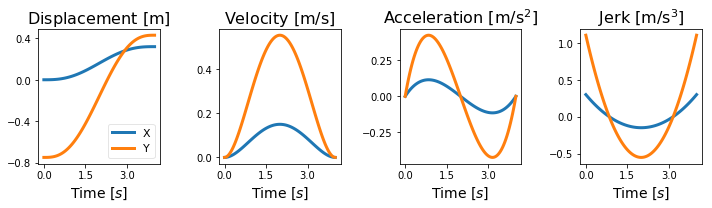

In [26]:
time, rlin, vlin, alin, jlin = minjerk([xi, yi], [xf, yf], duration=duration)

Let's find the joint angles to produce this minimum-jerk trajectory (inverse kinematics):

In [27]:
from invkin2_2d import invkin

Endpoint value outside working area. Value will be coerced.


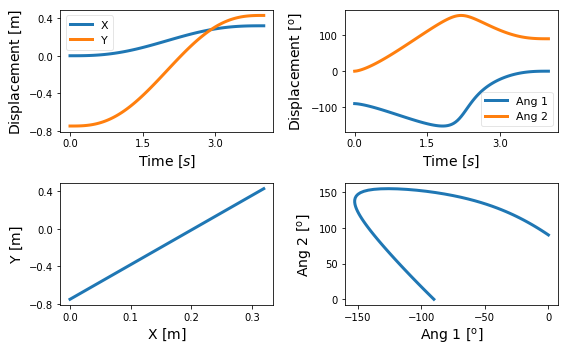

In [28]:
rang = invkin(time, rlin, L1=L1n, L2=L2n)

For the joint torques, we need to calculate the angular velocity and acceleration. Let's do that using numerical differentiation:

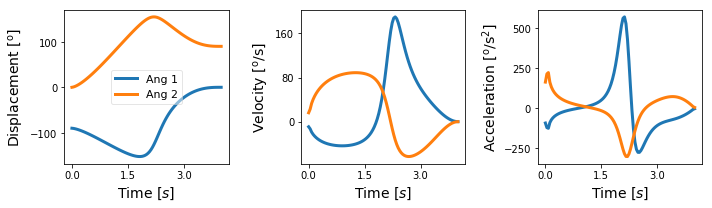

In [29]:
def diff_c(ang, duration):
    """Numerical differentiations using the central difference for the angular data.
    """
    # central difference (f(x+h)-f(x-h))/(2*h)
    dt = duration/(ang.shape[0]-1)
    vang = np.empty_like(rang)
    aang = np.empty_like(rang)
    vang[:, 0] = np.gradient(rang[:, 0], dt)
    vang[:, 1] = np.gradient(rang[:, 1], dt)
    aang[:, 0] = np.gradient(vang[:, 0], dt)
    aang[:, 1] = np.gradient(vang[:, 1], dt)
    
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(10, 3))
    ax[0].plot(time, rang*180/np.pi)
    ax[0].legend(['Ang 1', 'Ang 2'], framealpha=.5, loc='best')
    ax[1].plot(time, vang*180/np.pi)
    ax[2].plot(time, aang*180/np.pi)
    ylabel = [r'Displacement [$\mathrm{^o}$]', r'Velocity [$\mathrm{^o/s}$]', r'Acceleration [$\mathrm{^o/s^2}$]']
    for i, axi in enumerate(ax):
        axi.set_xlabel('Time [$s$]')
        axi.set_ylabel(ylabel[i])
        axi.xaxis.set_major_locator(plt.MaxNLocator(4))
        axi.yaxis.set_major_locator(plt.MaxNLocator(4))
    plt.tight_layout()
    plt.show()

    return vang, aang

vang, aang = diff_c(rang, duration)

In [30]:
def dyna(time, L1n, L2n, d1n, d2n, m1n, m2n, gn, I1n, I2n, q1, q2, rang, vang, aang, Fexn, Feyn, M, C, G, E):
    """Numerical calculation and plot for the torques of a planar two-link system.
    """
    from sympy import lambdify, symbols
    Mfun  = lambdify((I1, I2, L1, L2, d1, d2, m1, m2, q1, q2), M, 'numpy')
    Mn    = Mfun(I1n, I2n, L1n, L2n, d1n, d2n, m1n, m2n, rang[:, 0], rang[:, 1])
    M00   = Mn[0, 0][:, 0]*aang[:, 0]
    M01   = Mn[0, 1][:, 0]*aang[:, 1]
    M10   = Mn[1, 0][:, 0]*aang[:, 0]
    M11   = Mn[1, 1]*aang[:, 1]
    Q1d, Q2d = symbols('Q1d Q2d')
    dicti = {q1.diff(t, 1):Q1d, q2.diff(t, 1):Q2d}
    C0fun = lambdify((L1, d2, m2, q2, Q1d, Q2d), C[0].subs(dicti), 'numpy')
    C0    = C0fun(L1n, d2n, m2n, rang[:, 1], vang[:, 0], vang[:, 1])
    C1fun = lambdify((L1, d2, m2, q2, Q1d, Q2d), C[1].subs(dicti), 'numpy')
    C1    = C1fun(L1n, d2n, m2n, rang[:, 1], vang[:, 0], vang[:, 1])
    G0fun = lambdify((L1, d1, d2, m1, m2, g, q1, q2), G[0], 'numpy')
    G0    = G0fun(L1n, d1n, d2n, m1n, m2n, gn, rang[:, 0], rang[:, 1])
    G1fun = lambdify((L1, d1, d2, m1, m2, g, q1, q2), G[1], 'numpy')
    G1    = G1fun(L1n, d1n, d2n, m1n, m2n, gn, rang[:, 0], rang[:, 1])
    E0fun = lambdify((L1, L2, q1, q2, Fex, Fey), E[0], 'numpy')
    E0    = E0fun(L1n, L2n, rang[:, 0], rang[:, 1], 0, 0)
    E1fun = lambdify((L1, L2, q1, q2, Fex, Fey), E[1], 'numpy')
    E1    = E1fun(L1n, L2n, rang[:, 0], rang[:, 1], Fexn, Feyn)
    
    _, ax = plt.subplots(1, 2, sharex=True, squeeze=True, figsize=(10, 4))
    ax[0].plot(time, M00+M01)
    ax[0].plot(time, C0)
    ax[0].plot(time, G0)
    ax[0].plot(time, E0)
    ax[0].plot(time, M00+M01+C0+G0, 'k--', linewidth=4)
    ax[0].set_ylabel(r'Torque [Nm]')
    ax[0].set_title('Joint 1')
    ax[1].plot(time, M10+M11, label='Mass/Inertia')
    ax[1].plot(time, C1, label='Centripetal/Coriolis')
    ax[1].plot(time, G1, label='Gravitational')
    ax[1].plot(time, E1, label='External')
    ax[1].plot(time, M10+M11+C1+G1, 'k--', linewidth=4, label='Muscular (sum)')
    ax[1].set_title('Joint 2')
    ax[1].legend(framealpha=.5, loc='upper right', bbox_to_anchor=(1.6, 1))
    for i, axi in enumerate(ax):
        axi.set_xlabel('Time [$s$]')
        axi.xaxis.set_major_locator(plt.MaxNLocator(4))
        axi.yaxis.set_major_locator(plt.MaxNLocator(4))
    plt.tight_layout()
    plt.show()
    
    return M00, M01, M10, M11, C0, C1, G0, G1, E0, E1

In [31]:
Fexn, Feyn = 0, 0
M00, M01, M10, M11, C0, C1, G0, G1, E0, E1 = dyna(time, L1n, L2n, d1n, d2n, m1n, m2n, gn, I1n, I2n,
                                                  q1, q2, rang, vang, aang, Fexn, Feyn, M, C, G, E)

IndexError: too many indices for array

The joint torques essentially compensate the gravitational torque.

### Fast movement 

Let's see what is changed for a fast movement:

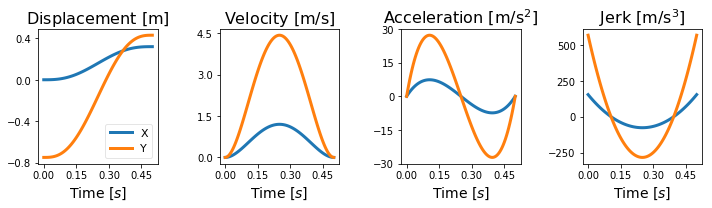

Endpoint value outside working area. Value will be coerced.


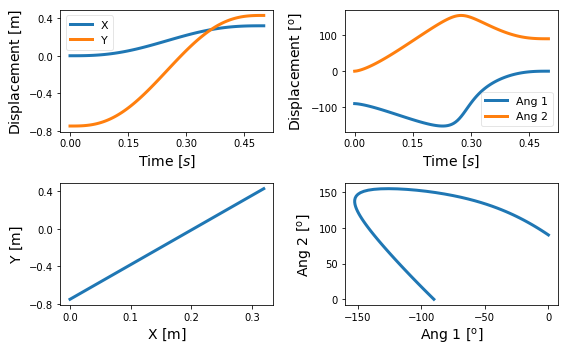

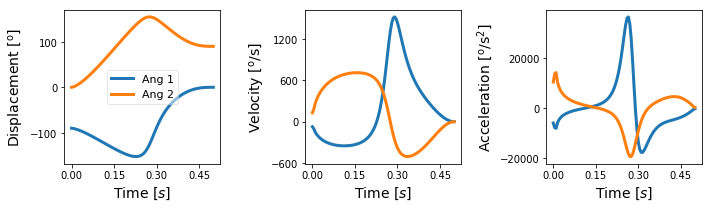

IndexError: too many indices for array

In [32]:
duration = 0.5  # seconds
time, rlin, vlin, alin, jlin = minjerk([xi, yi], [xf, yf], duration=duration)
rang = invkin(time, rlin, L1=L1n, L2=L2n)
vang, aang = diff_c(rang, duration)
M00, M01, M10, M11, C0, C1, G0, G1, E0, E1 = dyna(time, L1n, L2n, d1n, d2n, m1n, m2n, gn, I1n, I2n,
                                                  q1, q2, rang, vang, aang, Fexn, Feyn, M, C, G, E)

The interaction torques are larger than the gravitational torques for most part of the movement.

### Fast movement in the horizontal plane

Let's simulate a fast movement in the horizontal plane:

In [33]:
gn = 0  # gravity acceleration m/s2
M00, M01, M10, M11, C0, C1, G0, G1, E0, E1 = dyna(time, L1n, L2n, d1n, d2n, m1n, m2n, gn, I1n, I2n,
                                                  q1, q2, rang, vang, aang, Fexn, Feyn, M, C, G, E)

IndexError: too many indices for array

## Exercises

1. Derive the equations of motion for a single pendulum (not inverted).  
2. Derive the equations of motion for a double pendulum (not inverted).  
3. Consider the double pendulum moving in the horizontal plane and with no external force. Find out the type of movement and which torque terms are changed when:   
  a) $\dot{\alpha}_1=0^o$  
  b) $\alpha_2=0^o$  
  c) $\dot{\alpha}_2=0^o$  
  d) $2\alpha_1+\alpha_2=180^o$ (hint: a two-link system with this configuration is called polar manipulator)
4. Derive the equations of motion and the torque terms using angles in the segmental space $(\theta_1,\,\theta_2)$.  
5. Run the numerical simulations for the torques with different parameters.

## References

- Craig JJ (2005) [Introduction to Robotics: Mechanics and Control](http://books.google.com.br/books?id=MqMeAQAAIAAJ). 3rd Edition. Prentice Hall.  
- Hollerbach JM, Flash T (1982) [Dynamic interactions between limb segments during planar arm movement](http://link.springer.com/article/10.1007%2FBF00353957). Biological Cybernetics, 44, 67-77.  
- Nigg BM and Herzog W (2006) [Biomechanics of the Musculo-skeletal System](https://books.google.com.br/books?id=hOIeAQAAIAAJ&dq=editions:ISBN0470017678). 3rd Edition. Wiley.  
- Pandy MG (2001) [Computer modeling and simulation](https://drive.google.com/open?id=0BxbW72zV7WmUbXZBR2VRMnF5UTA&authuser=0). Annu. Rev. Biomed. Eng., 3, 245–73.  
- Sherman MA, Seth A, Delp SL (2013) [What is a moment arm? Calculating muscle effectiveness in biomechanical models using generalized coordinates](http://simtk-confluence.stanford.edu:8080/download/attachments/3376330/ShermanSethDelp-2013-WhatIsMuscleMomentArm-Final2-DETC2013-13633.pdf?version=1&modificationDate=1369103515834) in Proc. ASME Int. Design Engineering Technical Conferences (IDETC), Portland, OR, USA.  
- Zajac FE (1993) [Muscle coordination of movement: a perspective](http://e.guigon.free.fr/rsc/article/Zajac93.pdf). J Biomech., 26, Suppl 1:109-24.  
- Zajac FE, Gordon ME (1989) [Determining muscle's force and action in multi-articular movement](https://drive.google.com/open?id=0BxbW72zV7WmUcC1zSGpEOUxhWXM&authuser=0). Exercise and Sport Sciences Reviews, 17, 187-230.  
- Zatsiorsky VM (2002) [Kinetics of human motion](http://books.google.com.br/books?id=wp3zt7oF8a0C). Human Kinetics.